# Decision Tree Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import utils9

### Load the pickle files

In [2]:
# Load the features training set
with open('subsets_ft.pkl', 'rb') as file:
    features_training= pickle.load(file)
features_training

,DftYr,GP,G,A,A1,A2,PTS,Shifts,TOI,TOI/GP,...,TKA,PENT,PEND,OPS,DPS,PS,OTOI,GS,GS/G,Age
416,0.64,1.000000,0.575,0.428571,0.500000,0.258065,0.581395,0.665158,0.631581,0.562553,...,0.472622,0.417808,0.547445,0.521739,0.216216,0.418182,0.912349,0.542995,0.659459,0.304348
618,0.72,0.950617,0.025,0.111111,0.052632,0.161290,0.093023,0.721719,0.631836,0.600000,...,0.386167,0.568493,0.503650,0.078261,0.364865,0.175758,0.831395,0.059903,0.329730,0.260870
63,0.48,0.987654,0.025,0.222222,0.184211,0.225806,0.174419,0.890271,0.815014,0.785106,...,0.587896,0.726027,0.540146,0.104348,0.648649,0.321212,0.799686,0.205797,0.432432,0.521739
611,0.76,0.901235,0.150,0.269841,0.210526,0.290323,0.267442,0.773379,0.725383,0.760851,...,0.541787,0.643836,0.503650,0.260870,0.810811,0.503030,0.757226,0.399034,0.589189,0.217391
391,0.80,0.432099,0.150,0.079365,0.052632,0.096774,0.127907,0.285445,0.271271,0.548936,...,0.170029,0.335616,0.197080,0.165217,0.094595,0.115152,0.402721,0.110145,0.427027,0.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.80,0.777778,0.250,0.301587,0.289474,0.258065,0.337209,0.508296,0.433026,0.474468,...,0.317003,0.417808,0.467153,0.286957,0.216216,0.254545,0.745332,0.473430,0.697297,0.130435
223,0.84,0.876543,0.450,0.682540,0.789474,0.419355,0.709302,0.599548,0.597429,0.618298,...,0.452450,0.561644,0.788321,0.565217,0.202703,0.442424,0.787276,0.640580,0.783784,0.086957
271,0.44,0.962963,0.025,0.238095,0.184211,0.258065,0.186047,0.765460,0.686572,0.656170,...,0.414986,0.616438,0.649635,0.147826,0.324324,0.206061,0.869354,0.283092,0.491892,0.565217
474,0.92,1.000000,0.675,0.492063,0.394737,0.516129,0.674419,0.690045,0.646906,0.580000,...,0.515850,0.534247,0.678832,0.600000,0.256757,0.490909,0.955327,0.591304,0.691892,0.043478


In [3]:
# Load the features validation set
with open('subsets_fv.pkl', 'rb') as file:
    features_validation= pickle.load(file)
features_validation

,DftYr,GP,G,A,A1,A2,PTS,Shifts,TOI,TOI/GP,...,TKA,PENT,PEND,OPS,DPS,PS,OTOI,GS,GS/G,Age
9,0.84,0.111111,0.075,0.000000,0.000000,0.000000,0.034884,0.059578,0.047122,0.294468,...,0.011527,0.020548,0.021898,0.182609,0.054054,0.109091,0.114977,0.065700,0.454054,0.130435
511,0.72,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.001131,0.000983,0.092766,...,0.000000,0.000000,0.000000,0.147826,0.027027,0.072727,0.001517,0.042512,0.372973,0.043478
308,0.92,0.987654,0.500,0.507937,0.578947,0.322581,0.604651,0.773379,0.655592,0.599149,...,0.452450,0.472603,0.452555,0.495652,0.256757,0.418182,0.964684,0.486957,0.627027,0.000000
219,0.72,0.320988,0.050,0.015873,0.000000,0.032258,0.034884,0.151584,0.109517,0.222128,...,0.031700,0.260274,0.167883,0.139130,0.054054,0.072727,0.331531,0.051208,0.340541,0.434783
578,0.84,1.000000,0.400,0.460317,0.289474,0.580645,0.523256,0.700603,0.636480,0.568085,...,0.688761,0.397260,0.525547,0.382609,0.216216,0.327273,0.940119,0.477295,0.621622,0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,0.44,0.604938,0.050,0.015873,0.000000,0.032258,0.034884,0.190045,0.150053,0.119149,...,0.121037,0.116438,0.138686,0.113043,0.040541,0.054545,0.588957,0.079227,0.362162,0.521739
281,0.84,0.259259,0.025,0.031746,0.000000,0.064516,0.034884,0.150452,0.127009,0.385106,...,0.077810,0.095890,0.065693,0.156522,0.135135,0.127273,0.236576,0.066667,0.383784,0.086957
53,0.72,0.679012,0.050,0.142857,0.105263,0.161290,0.127907,0.535068,0.504497,0.686383,...,0.351585,0.404110,0.328467,0.147826,0.216216,0.157576,0.582710,0.142029,0.421622,0.217391
147,0.72,0.592593,0.150,0.126984,0.078947,0.161290,0.162791,0.322398,0.272974,0.362553,...,0.233429,0.294521,0.255474,0.191304,0.148649,0.157576,0.559750,0.172947,0.470270,0.391304


In [4]:
# Load the label training set
with open('subsets_lt.pkl', 'rb') as file:
    label_training= pickle.load(file)
label_training

456    8000000.0
674    1000000.0
69     5600000.0
667    3500000.0
431     950000.0
         ...    
243    4500000.0
248    6750000.0
298    4500000.0
519    6500000.0
390     925000.0
Name: Salary, Length: 622, dtype: float64

In [5]:
# Load the label validation set
with open('subsets_lv.pkl', 'rb') as file:
    label_validation= pickle.load(file)
label_validation

11      667500.0
558     630000.0
337     832500.0
244    2000000.0
634    4000000.0
         ...    
784     750000.0
309     632500.0
59     5250000.0
161    3500000.0
435    4500000.0
Name: Salary, Length: 78, dtype: float64

### Training a decision tree

#### Explain what the following hyperparameters control: max_depth, max_features, min_impurity_decrease, min_samples_leaf, min_samples_split.

**max_depth**: int, default=None. The maximun allowed depth. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**max_features**: int, float or {“auto”, “sqrt”, “log2”}, default=None. The maximum number of features considered at each split.

**min_impurity_decrease**: float, default=0.0. The decrease in impurity must be higher than this threshold to split a node.

**min_samples_leaf**: int or float, default=1. The minimum number of samples required for a leaf node. If a split leaves a leaf with less than this number of samples, the split is not performed.

**min_samples_split**: int or float, default=2. The minimum number of samples required to split a node.

### Try at least five different choices for the set of hyperparameters -- a grid search is encouraged.

**Hyperparameters Grid:**

splitter=[“best”, “random”]. The strategy used to choose the split at each node. 

max_depth=np.arange(1, 10). Set max depth from 1 to 9.

max_features=['auto', 'sqrt', 'log2']. See the best number of features to consider when looking for the best split.

min_impurity_decrease=[0.0, 0.1, 0.5, 1, 2]. Check the optimal decrease of the impurity for a split of a node.

min_samples_split=np.arrange(2,6). The minimum number of samples required to split an internal node set from 2 to 5.


In [6]:
# grid search for the best parameters
param_grid = {'splitter': ['best', 'random'],
              'max_depth': np.arange(1, 10), 
              'max_features':['auto', 'sqrt', 'log2'], 
              'min_impurity_decrease': [0.0, 0.1, 0.5, 1, 2], 
              'min_samples_split':np.arange(2,6)}

# set the grid search using fivefold cross validation
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, scoring='neg_root_mean_squared_error', cv=5)

# fit the grid search
grid=grid_search.fit(features_training, label_training)


In [7]:
# check the grid search results, sorted by test score from the best
grid_result = pd.DataFrame(grid.cv_results_,
                           columns=['rank_test_score','mean_test_score', 'std_test_score', 'params']).sort_values(by=['rank_test_score'],
                                                                                                                  ascending=True)
# set the display to show all the columns
pd.set_option('display.max_colwidth', None)

# check the top 10 results
grid_result.head()

,rank_test_score,mean_test_score,std_test_score,params
488,1,-1.472527e+06,132348.588638,"{'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 0.1, 'min_samples_split': 2, 'splitter': 'best'}"
496,1,-1.472527e+06,132348.588638,"{'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 0.5, 'min_samples_split': 2, 'splitter': 'best'}"
480,1,-1.472527e+06,132348.588638,"{'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'splitter': 'best'}"
512,1,-1.472527e+06,132348.588638,"{'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 2, 'min_samples_split': 2, 'splitter': 'best'}"
504,1,-1.472527e+06,132348.588638,"{'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 1, 'min_samples_split': 2, 'splitter': 'best'}"


We want to build different tree models with different scores in validation set to compare, so we only keep the first row and truncate the duplicates with the same test scores. 

Then we use the top ten parameters to build our models.

In [8]:
# keep the first one and delete the rest duplicated rows for the same mean_test_score and std_test_score
grid_result_none_duplicated= grid_result.drop_duplicates(subset=['mean_test_score', 'std_test_score'], keep='first')
# check the top 10 results
grid_result_none_duplicated.head()

,rank_test_score,mean_test_score,std_test_score,params
488,1,-1.472527e+06,132348.588638,"{'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 0.1, 'min_samples_split': 2, 'splitter': 'best'}"
248,6,-1.475257e+06,64461.997963,"{'max_depth': 3, 'max_features': 'auto', 'min_impurity_decrease': 0.1, 'min_samples_split': 2, 'splitter': 'best'}"
508,26,-1.516771e+06,165455.395868,"{'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 1, 'min_samples_split': 4, 'splitter': 'best'}"
514,31,-1.522821e+06,171820.614302,"{'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 2, 'min_samples_split': 3, 'splitter': 'best'}"
494,36,-1.528396e+06,166193.343033,"{'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 0.1, 'min_samples_split': 5, 'splitter': 'best'}"


i. Find predictions using the validation set.


ii.Use the score() function to display the training/validation coefficient of determination.

iii.Decide which metrics to use in analysis (e.g. absolute error, RMSE, MSE, recall, precision, Fβ score, etc.); calculate them using the validation set and display them. Explain how these metrics will help you decide which model is best.

Since our model is a regression model, we will exclude classification metrics and focus on mainly three metrics in our analysis, namely, mean absolute error (MAE), mean square error (MSE) and root mean square error(RMSE). 

**MAE** measures the average absolute difference between the predicted and actual salaries, so we are expecting a model with a lower MAE. Since it does not square the error, it is less sensitive to outliers compared to MSE and RMSE. 

**MSE** measures the average squared difference between the predicted and actual salaries. We are expecting a model with a lower MSE because it means the predicated salaries are closer to the actual earning. MSE gives higher weight to larger errors, which makes it sensitive to outliers.

Same with **RMSE** which is the square root of MSE, it measures the average error in the same units as the label which makes it easy to interpret. The lower the RMSE, the closer the prediction to the actually earning.

Additionally, we could also consider **R^2** when comparing models, since R^2 provides a measure of how well the model fits our data and help assess the proportion of variability in the label that can be explained by the model. It ranges from 0 to 1, a higher R^2 indicates a better fit of the model to the data. But we need to be aware that a model with a high R^2 value may not necessarily be a good predictor, as it may overfit the data resulting poor prediction on new data.

In a nutshell, since our goal here is to minimize the errors between actual salary and the predicted one, metrics like MAE, MSE, RMSE may be more appropriate in our case.

In [9]:
# keep the parameters for the top 10 results
params = grid_result_none_duplicated['params'].head(10)

# create a dictionary to store the best parameters
best_para ={}

# create a variable to store the minimum rmse
min_rmse=10000000

# loop through the parameters
for i in params:
    # create a decision tree model for each parameter
    dt = DecisionTreeRegressor(max_depth=i['max_depth'], 
                               max_features=i['max_features'], 
                               min_impurity_decrease=i['min_impurity_decrease'],
                               min_samples_split=i['min_samples_split'], 
                               splitter=i['splitter'], 
                               random_state=20 )

    # crate a model for each parameter                           
    model = dt.fit(features_training, label_training)

    # make predictions using validation set
    pred = model.predict(features_validation).astype(int)

    # return the training/validation coefficient of determination (R^2)
    score_training = model.score(features_training, label_training)
    score_validation= model.score(features_validation, label_validation)

    # return the mean absolute error
    mae = mean_absolute_error(label_validation, pred).astype(int)

    # return the mean squared error
    mse = mean_squared_error(label_validation, pred)

    # return the root mean squared error
    rmse =mean_squared_error(label_validation, pred, squared=False).astype(int) 
    
    # create a dataframe to compare different models
    compare = pd.DataFrame({'Actual': label_validation, 
                            'Predicted': pred, 
                            'R^2_validation': score_validation,
                            'R^2_training': score_training, 
                            'MAE':mae, 
                            'MSE':mse,
                            'RMSE':rmse})
    
    # check the parameter with the lowest rmse
    if rmse<min_rmse:
        best_para = i
        min_rmse=rmse
        
    print("Parameters:", i)
    print(compare)
    print('--------------------------------------------------------------------------')

Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 0.1, 'min_samples_split': 2, 'splitter': 'best'}
        Actual  Predicted  R^2_validation  R^2_training      MAE  \
11    667500.0     857424        0.300792      0.798374  1176083   
558   630000.0     857424        0.300792      0.798374  1176083   
337   832500.0    5177586        0.300792      0.798374  1176083   
244  2000000.0    1163461        0.300792      0.798374  1176083   
634  4000000.0    3696538        0.300792      0.798374  1176083   
..         ...        ...             ...           ...      ...   
784   750000.0    1163461        0.300792      0.798374  1176083   
309   632500.0     857424        0.300792      0.798374  1176083   
59   5250000.0    3416666        0.300792      0.798374  1176083   
161  3500000.0    1163461        0.300792      0.798374  1176083   
435  4500000.0    3728705        0.300792      0.798374  1176083   

              MSE     RMSE  
11   3.466727e+12  1861914 

### Compare models and justify a final choice of hyperparameters based on the above quantitative analysis and the use case. Comment on overfitting, underfitting, depth and any qualitative reasoning.

In [10]:
print("Best parameters from the above ten models:", best_para, "with RMSE:", min_rmse)

Best parameters from the above ten models: {'max_depth': 4, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_split': 5, 'splitter': 'random'} with RMSE: 1327861


**Best Model from the above ten models:**

Paramters: {'max_depth': 4, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_split': 5, 'splitter': 'random'} 

MSE = 1763215000000

RMSE = 1327861

MAE = 939173

R^2 (Validation) = 0.644375      

R^2 (Training) = 0.627263  

Based on our chosen evaluation metrics, we prioritized the model with the lowest RMSE and MSE values for further analysis. 

The RMSE was calculated be \\$1327,861, representing the average squared root difference between the predicted and actual salaries, and the MAE to be \\$939,173, representing the average absolute difference. We observed that the model with the lowest RMSE outperforms the other models. The MSE, RMSE, and MAE values are relatively lower than those of the other models, indicating that the model's predictions are closer to the actual salaries and it can provide more accurate salary estimates.

Furthermore, we observed the R-squared value for both the training set and validation set is better than the rest. The R^2 value was calculated to be 0.63 for the training set, indicating that 63% of the variance in the salaries can be explained by the model. Similarly, the R^2 value was also found to be 0.64 for the validation set, indicating that the model captures 64% of the variability in salaries.

Additionally, the model's depth should be taken into consideration. With 70 features fed into the model, there is a risk of overfitting if the depth is not properly controlled. As observed in the results, models with larger depth values tend to achieve better scores in the training set but poorer scores in the validation set, indicating overfitting. This is also proved by the larger values of MAE and RMSE in the validation set. In contrast, the model with a depth of 4 shows a balanced performance in both training and validation sets, suggesting that it is not overfitting.

It needs to be mindful that though it is the best model we found from the above ten, the R-squared value of this mode is relatively low and the model is also exhibiting high errors in other metrics like RMSE, it could suggest that the model is a little underfitting.


In [11]:
print('The best parameters chosen by GridSearch:',grid.best_params_)

The best parameters chosen by GridSearch: {'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'splitter': 'best'}


We observed that the grid search obtained a different set of best parameters. This could be due to the fact that we did not perform cross-validation when selecting the best parameters from the ten models evaluated in the grid search. As more data is fed into the model, the optimal parameters may change. While during the grid search, we utilized five-fold cross-validation, meaning splitting the training data into five subsets for model evaluation. Therefore, we  trust the obtained result and will use the parameter set from grid search. But the logic behind selecting the best parameters was based on a combination of quantitative and qualitative analysis, as explained above.

In [12]:
# create a model with the best parameters
best_dt=DecisionTreeRegressor(max_depth=5, max_features='auto', min_impurity_decrease= 0.0, min_samples_split=2, splitter='best', random_state=20)
best_dt.fit(features_training, label_training)

DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=20)

Use the display_tree method in utils9.py to display the chosen decision tree.

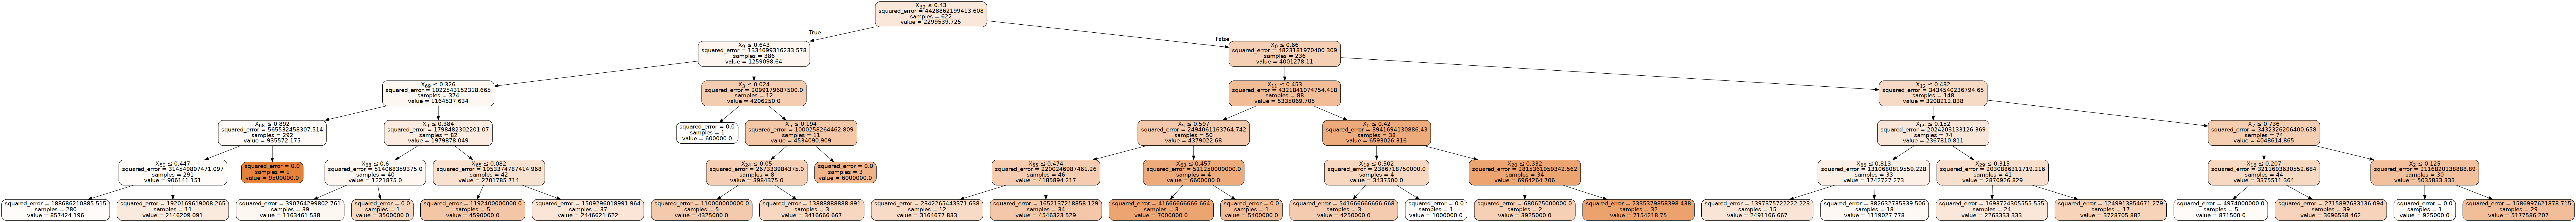

In [13]:
utils9.display_tree(best_dt)

Next, we plot the predicted and acutal salaries to exam where to improve next.

In [14]:
# save the prediction
pred=best_dt.predict(features_validation)

In [15]:
# create a dataframe to compare the actual and predicted values
acts=pd.DataFrame({'Actual':label_validation, 'Predicted':pred}).astype(int)
acts

,Actual,Predicted
11,667500,857424
558,630000,857424
337,832500,5177586
244,2000000,1163461
634,4000000,3696538
...,...,...
784,750000,1163461
309,632500,857424
59,5250000,3416666
161,3500000,1163461


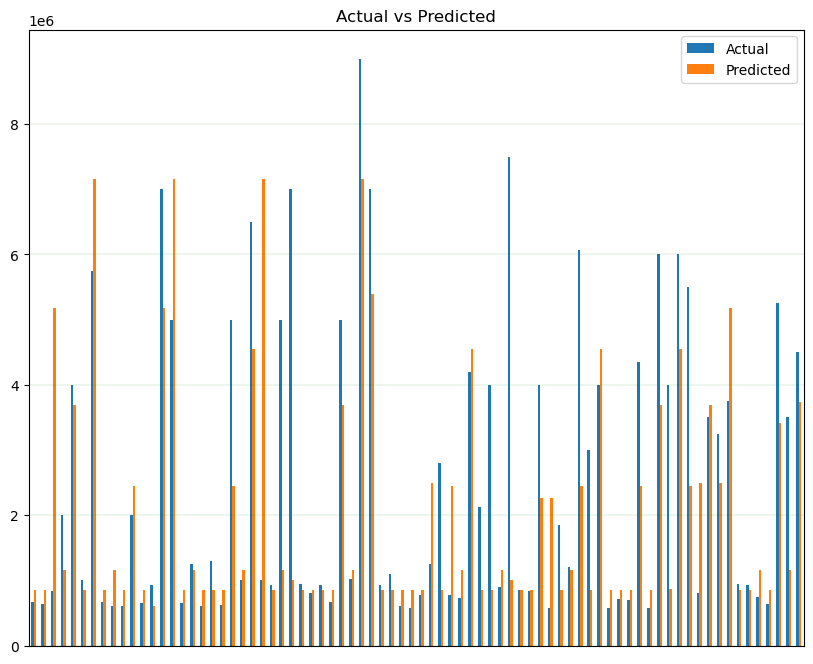

In [16]:
# plot the actual and predicted values
acts.plot(kind='bar',figsize=(10,8))
# set the title
plt.title('Actual vs Predicted')
# set the x_axis ticks to empty
plt.xticks([])
# set the grid
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle='-', linewidth='0.1', color='black')
plt.show()


After examing the most important features considered by our model, we found that the top predictor of salary is FF, the team's unblocked shot attempts while this player was on the ice. The next highest is the metrics of age (draft year). After that, we saw measures of time on ice divided by games and shot attempts taken by individual player. These predictors give us a clear picture of how we can predict a player's salary.

In [17]:
# check the rank of the importance of each feature
features_ranking = pd.Series(best_dt.feature_importances_, index=features_validation.columns, name='importance').sort_values(ascending=False)
features_ranking.head(10)

FF        0.500739
DftYr     0.133747
TOI/GP    0.069314
iCF       0.048121
iFF       0.047528
Age       0.042328
GS/G      0.035886
Shifts    0.022358
iRB       0.016082
A2        0.013782
Name: importance, dtype: float64

In [18]:
# create a dataframe to store the importance of each feature
fi_df = pd.DataFrame( 100*best_dt.feature_importances_/best_dt.feature_importances_.max(), 
                     index=features_validation.columns,
                     columns =['importance'])
# sort the dataframe by importance
fi_df.sort_values(by='importance', ascending=False, inplace=True)
# only keep the top 10 features
fi_df=fi_df.head(10)

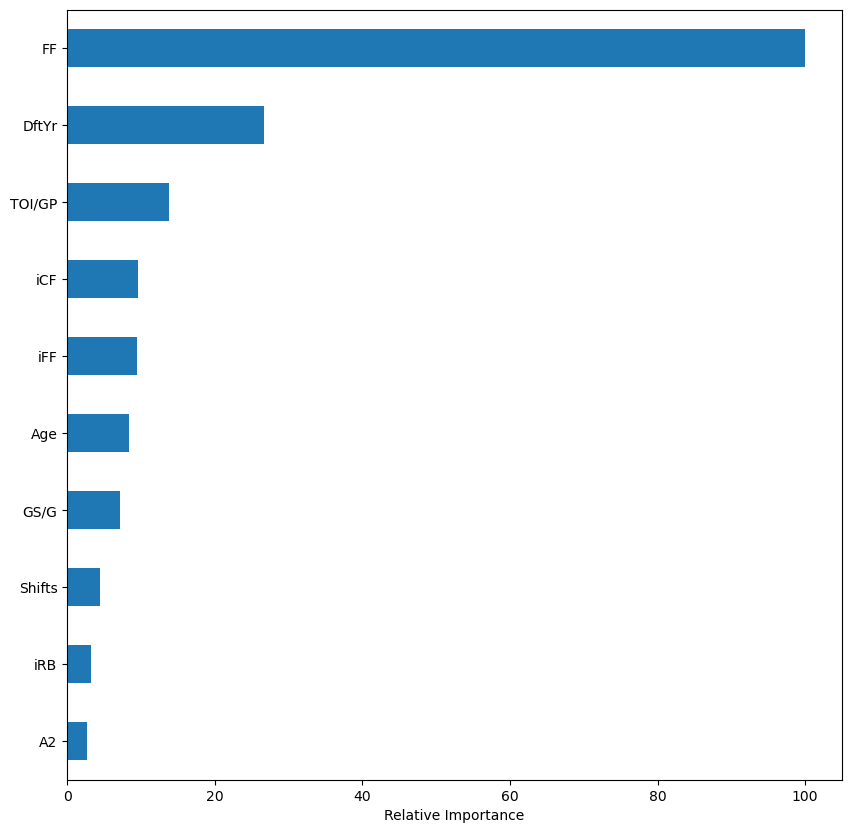

In [19]:
# plot the importance of features in a bar chart
fi_df.sort_values(by='importance').plot(kind='barh', figsize=(10,10))
plt.xlabel('Relative Importance')
plt.gca().legend_ = None

In [20]:
# store the model in Pickle
with open('model_dt.pkl', 'wb') as file:
    file.write(pickle.dumps(best_dt))
